In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

plt.rcParams['figure.figsize'] = (12,6)

## 01. Trend

> A trend is a pattern that is observed over a period of time and represents the mean rate of change with respect to time. A trend usually shows the tendency of the data to increase/uptrend or decrease/downtrend during the long run. It is not always necessary that the increase or decrease is in the same direction throughout the given period of time.

## Detecting Trend Using a Hodrick-Prescott Filter

<AxesSubplot:xlabel='observation_date'>

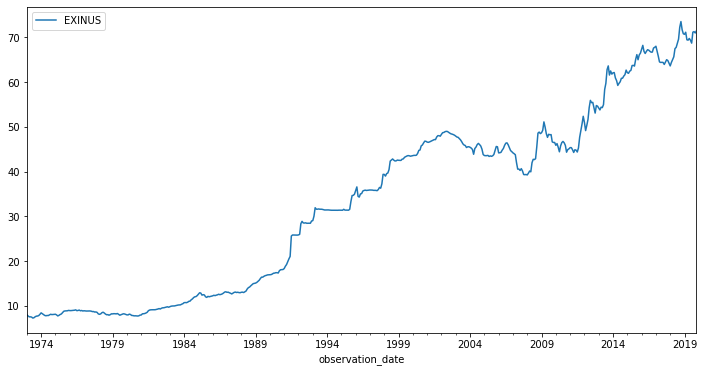

In [9]:
from statsmodels.tsa.filters.hp_filter import hpfilter

df = pd.read_excel('../datasets/India_Exchange_Rate_Dataset.xls', index_col=0, parse_dates=True)
df.plot()

<AxesSubplot:xlabel='observation_date'>

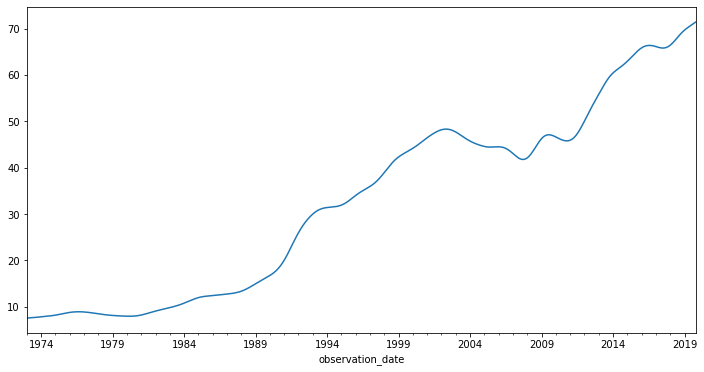

In [10]:
cycle, trend = hpfilter(df['EXINUS'],lamb=1600)
trend.plot()

<AxesSubplot:xlabel='observation_date'>

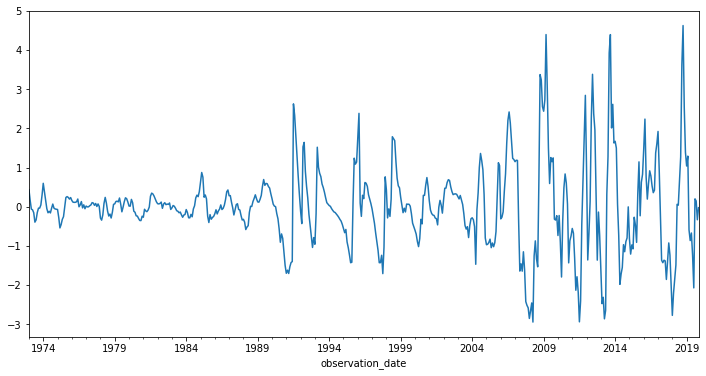

In [11]:
cycle.plot()

## Detrending a Time Series
> Detrending is the process of removing a trend from time-series data, or it mentions a change in the mean over time. It is continuously increasing or decreasing over the duration of time. Identification, modeling, and even removing trend data from time-series datasets can be beneficial.

- **Methods to detrend a Time-Series** 
    - Pandas Differencing
    - Scipy Signal
    - Hp filter

<AxesSubplot:xlabel='observation_date'>

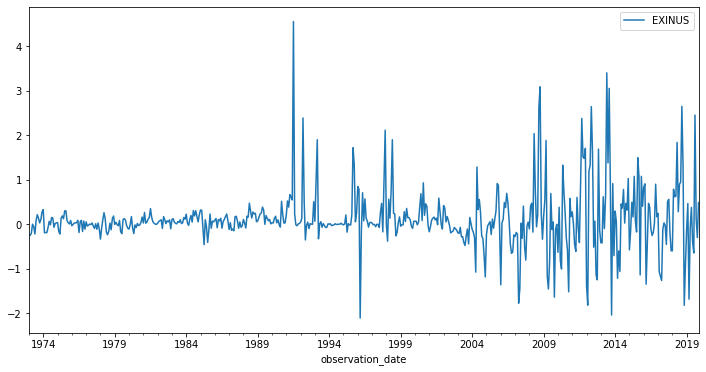

In [13]:
## 1 --- Detrending using pandas differencing

diff = df.diff()
diff.plot()

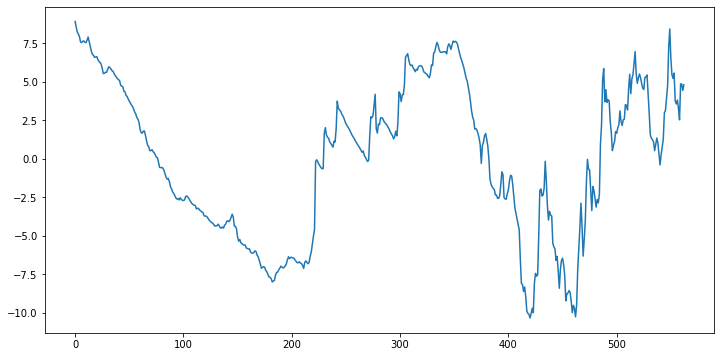

In [18]:
## 2 --- Detrending using Scipy Signal

from scipy.signal import detrend

dt = detrend(df.EXINUS.values)
plt.plot(dt)
plt.show()

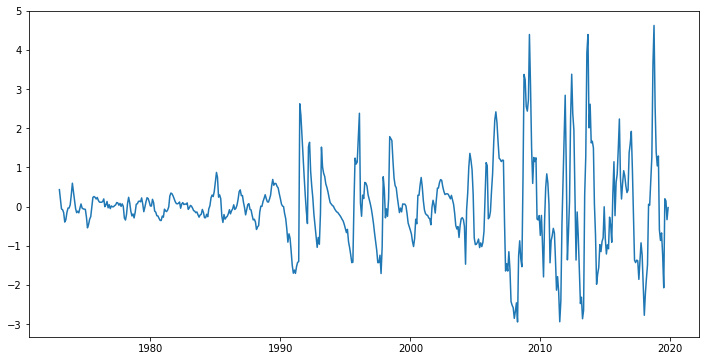

In [22]:
## 3 --- Detrending using hp filter

cycle, trend = hpfilter(df.EXINUS)

# removing trend form the data
dtrd = df.EXINUS - trend

###--- cycle data is detrended data ---###
plt.plot(dtrd)
# plt.plot(cycle)
plt.show()

## 02. Seasonality
> Seasonality is a periodical fluctuation where the same pattern occurs at a regular interval of time. It is a characteristic of economics, weather, and stock market time-series data; less often, it’s observed in scientific data. In other industries, many phenomena are characterized by periodically recurring seasonal effects. For example, retail sales tend to increase during Christmas and decrease afterward.

- **The following methods can be used to detect seasonality:**
    - Multiple box plots
    - Autocorrelation plots

In [29]:
df['month'] = df.index.month_name()
df['year'] = df.index.year

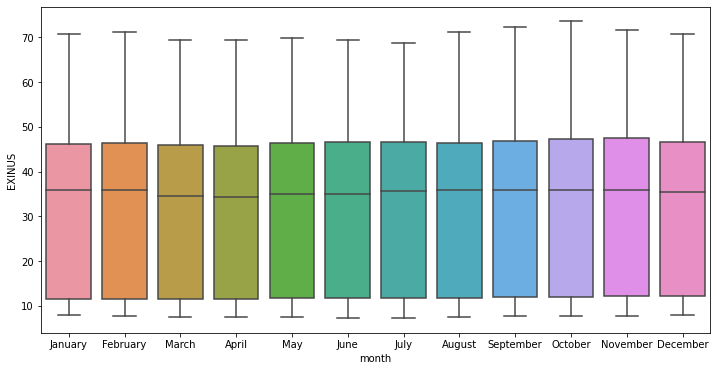

In [32]:
sns.boxplot(x='month', y='EXINUS', data=df)
plt.show()

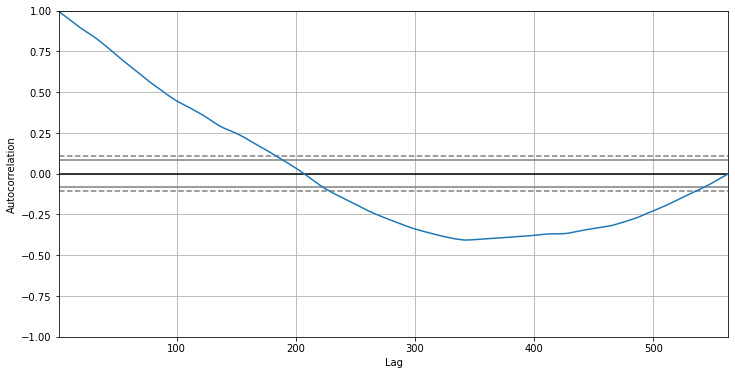

In [35]:
## autocorrelation plot
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df.EXINUS)
plt.show()

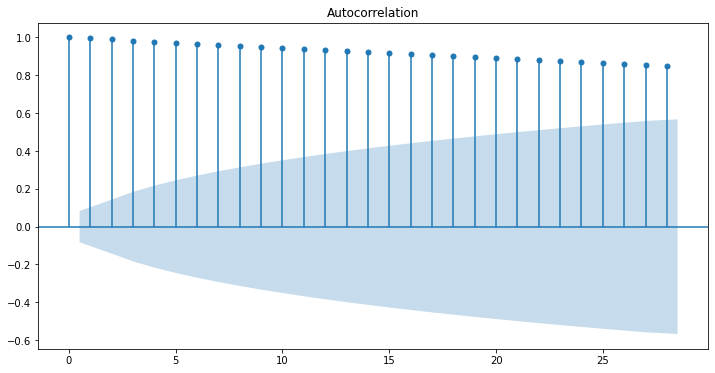

In [37]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df.EXINUS);

## Deseasoning of Time-Series Data
> Deseasoning means to remove seasonality from time-series data. It is stripped of the pattern of seasonal effect to deseasonalize the impact.

### Time-series data contains four main components. 
1. **Level** means the average value of the time-series data. 
2. **Trend** means an increasing or decreasing value in time-series data.
3. **Seasonality** means repeating the pattern of a cycle in the time-series data.
4. **Noise** means random variance in time-series data.

> **Note** An additive model is when time-series data combines these four components for linear trend and seasonality, and a multiplicative model is when components are multiplied to gather for nonlinear trends and seasonality.

## Seasonal Decomposition
> Decomposition is the process of understanding generalizations and problems related to time-series forecasting. **We can leverage seasonal decomposition to remove seasonality from data and check the data only with the trend, cyclic, and irregular variations.**

> **The additive model works with linear trends of time-series data such as
changes constantly over time.** <br> <br>
> **The multiplicative model works with a nonlinear type of data such as
quadric or exponential.**

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df.EXINUS, model='multiplicative', extrapolate_trend='freq')

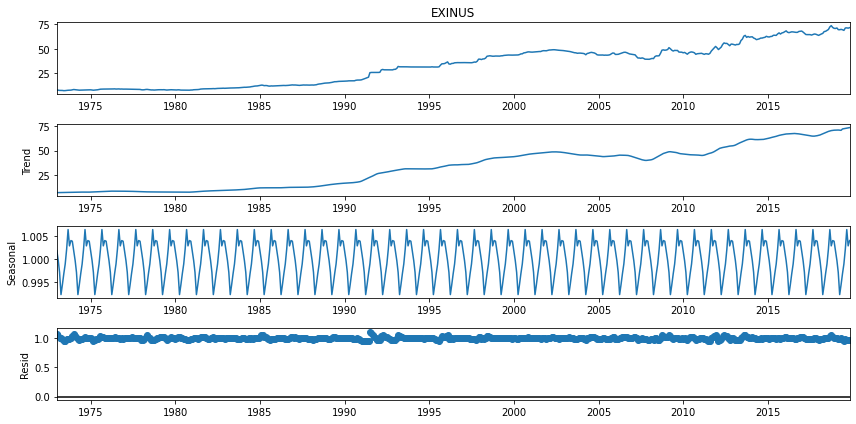

In [40]:
result.plot();

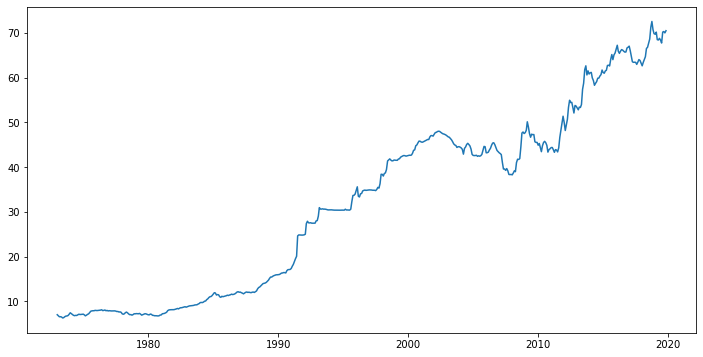

In [41]:
deseason = df.EXINUS - result.seasonal
plt.plot(deseason)
plt.show()

## Cyclic Variations
> Cyclical components are fluctuations around a long trend observed every few units of time; this behavior is less frequent compared to seasonality. It is a recurrent process in a time series

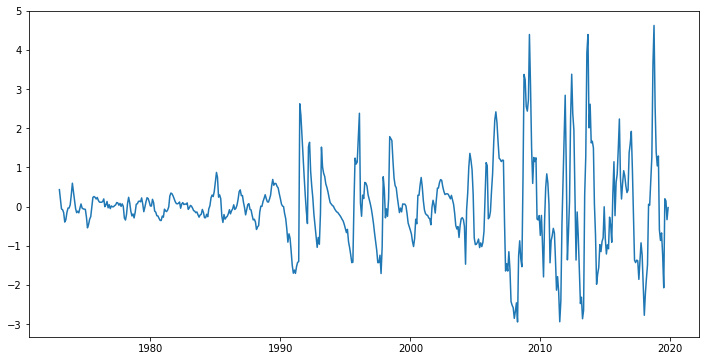

In [42]:
## from hpfilter results
plt.plot(cycle)
plt.show()

> **Errors,Unexpected Variations, and Residuals** <br>
When trend and cyclical variations are removed from time-series data, the patterns left behind that cannot be explained are called errors, unexpected variations, or residuals.